In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
dataset = pd.read_csv('classification_data/Social_Network_Ads.csv').values
print(dataset)

[[   19 19000     0]
 [   35 20000     0]
 [   26 43000     0]
 ...
 [   50 20000     1]
 [   36 33000     0]
 [   49 36000     1]]


In [12]:
X = dataset[:,:-1]
y = dataset[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)

In [15]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train_sc,y_train)

LogisticRegression()

In [16]:
X_test_sc = sc.transform(X_test)
y_pred_sc = logistic.predict(X_test_sc)

In [17]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred_sc)
print('accuracy: ',acc)

accuracy:  0.89


### confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
con = confusion_matrix(y_test,y_pred_sc)
recall = recall_score(y_test,y_pred_sc)
precision = precision_score(y_test,y_pred_sc)
print('confusion matrix: \n',con)
# [[TN, FP],
#  [FN, TP]]
print('recall: ',recall)
print('precision: ',precision)
# recall = TP/(TP+FN)
# precision = TP/(TP+FP)

confusion matrix: 
 [[65  3]
 [ 8 24]]
recall:  0.75
precision:  0.8888888888888888


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


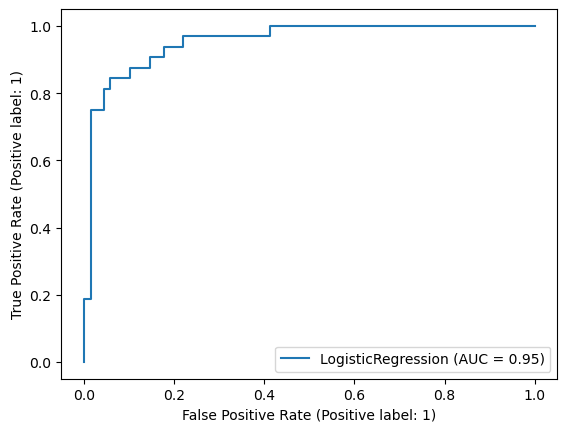

In [22]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logistic,X_test_sc,y_test)
# plot_roc_curve(모델,X,실제y)